In [842]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import scipy.special as sps
import pandas as pd
import random

In [843]:
#Model Variables and Parameters
age_average_x=20
# Current average ages in year for underground and overhead distribution lines (in years)
length_average_x=0.5
# Circuit length in mile for underground and overhead transission and distribution lines
number_circuit= 650
# Numbers showing different circuit in network (Shrewsbury has 191.5 miles overhead, 121.7 miles underground line, eaach circuit is about 25 miles in Larsen paper)
baseyear=2021
#the year in which we are going to start conducting cost analysis
underground_baseyear=121
#Length of undergeound lines in miles in base year
r=0.1
# Discount rate=10%
overhead_line={'lifespan':60,'replcost':104000,'replcost_growth_rate':0.02,'om_percentage_replcost':0.005}
underground_line={'lifespan':45,'replcost':357000,'replcost_growth_rate':0.02,'om_percentage_replcost':0.005}
#overhead_line={'over_or_under':0,'lifespan':60,'replcost':104000,'replcost_growth_rate':0.02,'om_percentage_replcost':0.005}
#underground_line={'over_or_under':1,'lifespan':45,'replcost':357000,'replcost_growth_rate':0.02,'om_percentage_replcost':0.005}
# over_or_under= Type of Line. x=0 for underground distribution lines and x=1 for overhead distribution lines
#lifespan=Useful lifespan of overhead line and underground lines (60 for overhead and 45 for underground)
#replcost_growth_rate= replacement cost annual growth/decay rate 
# om_percentage_replcost= percentage of the overall replacement costs which equals to annual O&M expenses (OPEX) for each type of T&D line
###

In [844]:
shape_age_x=(age_average_x)/(((age_average_x)/2)**2)
#Shape of Gamma distribution required for simulating liene circuits ages
print(shape_age_x)

0.2


In [845]:
scale_age_x=(((age_average_x)/2)**2)/(age_average_x)
#scale of Gamma distribution required for simulating line circuits ages
print(scale_age_x)

5.0


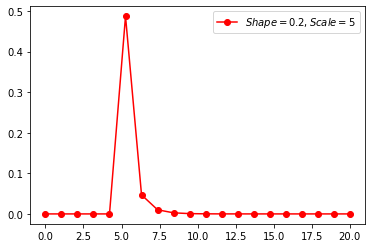

In [846]:
x = np.linspace(0, 20, 20)
y = stats.gamma.pdf(x, shape_age_x, scale_age_x)

plt.plot(x, y, "ro-", label=(r'$Shape=0.2, Scale=5$'))
plt.legend(loc='upper right')
#Plotting gamma distribution with shape and scale of circuits ages

In [847]:
shape_length_x=length_average_x/(length_average_x/2)**2
#Shape of Gamma distribution required for simulating liene circuits ages
print(shape_length_x)

8.0


In [848]:
scale_length_x=(length_average_x/2)**2/length_average_x
#scale of Gamma distribution required for simulating line circuits ages
print(scale_length_x)

0.125


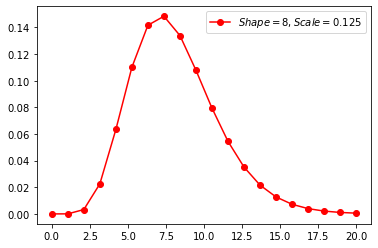

In [849]:
x = np.linspace(0, 20, 20)
y = stats.gamma.pdf(x, shape_length_x, scale_length_x)

plt.plot(x, y, "ro-", label=(r'$Shape=8, Scale=0.125$'))
plt.legend(loc='upper right')
#Plotting gamma distribution with shape and scale of circuits lengths

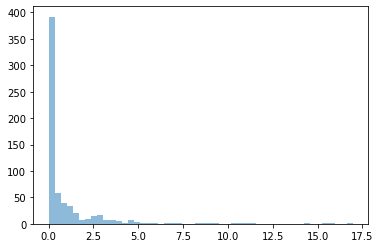

[6.91206901e-05 1.60751163e-01 4.96984048e-02 8.22503134e+00
 1.01736847e+01 9.65497138e-01 1.01686109e-01 2.08878915e-01
 2.74905657e-02 3.76797108e-04 1.57905263e-12 4.04678229e-03
 8.12486610e-01 5.01320945e-01 8.21577926e-08 4.82400687e+00
 3.40448733e-05 3.36329671e-01 1.81133435e-01 8.36168675e-11
 3.39049498e+00 9.13427328e-01 8.36877408e+00 1.37586128e-03
 1.91407163e+00 3.42240448e-01 1.09229033e-02 3.33316734e-03
 4.09028372e-06 5.19795934e+00 3.53909661e-02 1.39663492e-01
 7.03302142e-02 2.51438161e-01 2.48337884e-01 4.86381500e+00
 1.21352045e-03 2.23200981e-02 1.17050995e-03 4.86268553e-04
 2.00605882e-01 2.35897042e-01 2.67618080e-06 5.68217161e-01
 1.15640053e+00 5.80466511e-02 1.99562197e-01 2.06098328e+00
 2.23610601e+00 1.05257854e-02 1.72005804e-02 6.19189819e-03
 6.50754667e-01 6.68519924e-05 3.97453665e-02 1.15703695e-04
 1.32756972e-06 1.56611365e-03 1.02806155e+00 4.89377329e-01
 1.06031320e-02 2.84451535e-03 1.78651422e-04 1.22481054e+00
 1.71929196e-04 7.147132

In [850]:
age=np.random.gamma(shape_age_x,scale_age_x,number_circuit)
plt.hist(np.random.gamma(shape_age_x,scale_age_x,number_circuit),alpha=0.5,bins=50)
plt.show()
print (age)
#Randomly determined circuit's ages in the base year

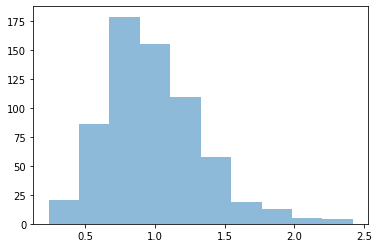

In [851]:
lengths=np.random.gamma(shape_length_x,scale_length_x,number_circuit)
plt.hist(np.random.gamma(shape_length_x,scale_length_x,number_circuit),alpha=0.5)
plt.show()
#print (lengths)
#Randomly determined circuit's ages in the base year
### I guess these numbers are not correct because I do not expect to see such circuit's ages from a gamma distribution with an average age 20.

In [852]:
#class Circuit:
    #def __init__(self, length, age, x):
        #self.length=length
        #self.age=age
        #self.x=x
    
#circuit_1=Circuit(25,20,0)
#circuit_2=Circuit(24,21,1)
#circuit_3=Circuit(22,22,1)
#circuit_4=Circuit(18,18,0)
#circuit_5=Circuit(25,30,1)
#circuit_6=Circuit(36,19,0)
#circuit_7=Circuit(31,29,0)
#circuit_8=Circuit(29,27,1)
#circuit_9=Circuit(25,24,0)
#circuit_10=Circuit(27,26,0)

In [853]:
random.uniform(0,1)

0.5909365421280207

In [854]:
class Circuit:
    ## The __init__ function is the constructor
    def __init__(self, shape_age_x, scale_age_x, shape_length_x, scale_length_x, overhead_proportion):        
        self.age = [np.random.gamma(shape_age_x, scale_age_x)] # set the age as a list, which can be dynamically expanded
        self.length = np.random.gamma(shape_length_x,scale_length_x) # we can assume the length is fixed over time
        overhead_probability = random.uniform(0,1)
        if overhead_probability > overhead_proportion: # if underground = 0, then segment is overhead.
            self.underground = [1] # again, a dynamic list.
        else:
            self.underground = [0]
        
###Lifecycle Infrastructure Costs:
    def get_underground(self):
        #self.over_or_under = self.underground
        return (self.underground)
    # Randomly determining status of overhead or underground of circuit
    def get_random_age_baseyear(self):
        #random.seed(1)
        #self.age= np.random.gamma(shape_age_x, scale_age_x)
        return (self.age)
    # Randomly determining circuit's ages in the base year
    def get_random_length_baseyear(self):
        #random.seed(1)
        #self.length= np.random.gamma(shape_length_x,scale_length_x)
        return (self.length)
    # Randomly determining circuit's ages in the base year
###Three above methods are defined to identify lengh, age and overhead or underground, which are three atributes of a circuit.
    #def lifespan_over_or_under(self):
        #if self.over_or_under()==0:
            #lifespan_x= overhead_line['lifespan']
        #elif self.over_or_under()==1:
            #lifespan_x= underground_line['lifespan']
        #else:
            #lifespan_x=0
        #return (lifespan_x)
    #def replcost_x_over_or_under(self):
        #if self.over_or_under==0:
            #lifespan_x= overhead_line['lifespan']
        #if self.over_or_under==1:
            #lifespan_x= underground_line['lifespan']
        #print (lifespan_x)
###Above methods are for defining different parameters in the model subject to x=0(overhead) or x=1(underground)
    
    # def set_lifespan(): # SET lifespan separately
    def get_age_array(self):
        over_or_under= self.get_underground()[0]
        if over_or_under==0:
            lifespan_x= int(overhead_line['lifespan'])
        elif over_or_under==1:
            lifespan_x= int(underground_line['lifespan'])
        #else:
            #lifespan_x=0
        age_i_baseyear= self.age[0] #self.get_random_age_baseyear()
        age_i_t=0
        age_i_t_array=[]
        for t in range (baseyear,baseyear+underground_line['lifespan']):
            if age_i_baseyear<=lifespan_x:
                age_i_t= (age_i_baseyear)+(t-baseyear)
                age_i_t_array.append(age_i_t)
            elif age_i_baseyear-lifespan_x==1:
                age_i_t=1
                age_i_t_array.append(age_i_t)
            elif age_i_baseyear-lifespan_x>1:
                age_i_t=(age_i_t)+1
                age_i_t_array.append(age_i_t)
        return(age_i_t_array)
    def get_current_age(self,t):
        ages_list=self.get_age_array()
        current_age=ages_list[t-baseyear]
        return(current_age)
    # Determining list of circuit's ages based on different ts
    def get_replcost_x_t(self):
        #over_or_under= self.get_underground()
        over_or_under= self.get_underground()[0]
        if over_or_under==0:
            lifespan_x=overhead_line['lifespan']
            replecost_x=overhead_line['replcost']
            replcost_growth_rate_x=overhead_line['replcost_growth_rate']
        elif over_or_under==1:
            lifespan_x= underground_line['lifespan']
            replecost_x=underground_line['replcost']
            replcost_growth_rate_x= underground_line['replcost_growth_rate']
        #else:
            #lifespan_x=0
            #replecost_x=0
            #replcost_growth_rate_x=0
        replcost_x_array=[]
        for t in range (baseyear,baseyear+underground_line['lifespan']):
            if t==baseyear:
                replcost_x_t= replecost_x
                replcost_x_array.append(replcost_x_t)
            else:
                replcost_x_t= (replecost_x)+(replcost_growth_rate_x)*(t-baseyear)*(replecost_x)
                replcost_x_array.append(replcost_x_t)
        return (replcost_x_array)
    # Determining list of replacement cost for circuite i from line x based on different ts.
    def get_capex_StatusQuo_i(self): 
        replcost_x=self.get_replcost_x_t()
        age_i=self.get_age_array()
        capex_StatusQuo_i=0
        capex_StatusQuo_list=[]
        for t in range (baseyear,baseyear+underground_line['lifespan']):
            replcost_x_t= replcost_x[t-baseyear]
            age_i_t=age_i[t-baseyear]
            if age_i_t==1:
                capex_i=((rplcost_x_t)(age_i_t))/((1+r)**(t-baseyear))
                capex_StatusQuo_i=(capex_StatusQuo_i)+(capex_i)
                capex_StatusQuo_list.append(capex_StatusQuo_i)
            else:
                capex_StatusQuo_i=0
                capex_StatusQuo_list.append(capex_StatusQuo_i)
        return (max(capex_StatusQuo_list))
    #Determining list of Status quo capital expenses (CAPEX) occurring in future years (t) when the age of the circuit exceeds the expected useful lifespan
    def get_opex_x_t(self):
        over_or_under= self.get_underground()[0]
        age_i=self.get_age_array()
        replcost_x=self.get_replcost_x_t()
        if over_or_under==0:
            om_percentage_replcost_x=overhead_line['om_percentage_replcost']
        elif over_or_under==1:
            om_percentage_replcost_x= underground_line['om_percentage_replcost']
        #else:
            #om_percentage_replcost_x=0
        opex_x_t_array=[]
        for t in range (baseyear,baseyear+underground_line['lifespan']):
            opex_x_t=0
            age_i_t=age_i[t-baseyear]
            replcost_x_t=replcost_x[t-baseyear]
            if age_i_t==1:
                opex_x_t=(om_percentage_replcost_x)*(replcost_x_t)
                opex_x_t_array.append(opex_x_t)
            elif age_i_t>1:
                opex_x_t=(om_percentage_replcost_x)*(replcost_x_t)
                opex_x_t=(opex_x_t)+(om_percentage_replcost_x)*(replcost_x_t)
                opex_x_t_array.append(opex_x_t)
            else:
                None
        return (opex_x_t_array)
    #Annual operation and maintenance expenses for each line
    def get_opex_StatusQuo_i(self):
        opex_x=self.get_opex_x_t()
        length_i=self.get_random_length_baseyear()
        opex_StatusQuo_i=0
        for t in range (baseyear,baseyear+underground_line['lifespan']):
            opex_x_t=opex_x[t-baseyear]
            opex_i=((opex_x_t)*(length_i))/((1+r)**(t-baseyear))
            opex_StatusQuo_i=(opex_StatusQuo_i)+(opex_i)
        return (opex_StatusQuo_i)
    #Discounting annual O&M expenses incurred for each circuit 
    def get_lifecyclecost_StatusQuo(self):
        lifecyclecost_StatusQuo=0
        for i in range (number_circuit):
            capex_StatusQuo_i=self.get_capex_StatusQuo_i()
            opex_StatusQuo_i=self.get_opex_StatusQuo_i()
            lifecyclecost_i=capex_StatusQuo_i+opex_StatusQuo_i
            lifecyclecost_StatusQuo=lifecyclecost_StatusQuo+lifecyclecost_i
        return (lifecyclecost_StatusQuo)
    #Total lifecycle costs, under the status quo
###Above methods are required methods for determining lifecycle costs associated with status quo
    def get_first_retire_i(self):
        age_baseyear=self.get_random_age_baseyear()
        age_baseyear_i=age_baseyear[0]
        over_or_under= self.get_underground()[0]
        if over_or_under==0:
            lifespan_x=overhead_line['lifespan']
        elif over_or_under==1:
            lifespan_x= underground_line['lifespan']
        #else:
            #lifespan_x=0
        first_retire_i=(lifespan_x)-(age_baseyear_i)+baseyear
        return (first_retire_i)
    #Determining the first retirement year Under the undergrounding alternative
    def get_capex_underground_i(self):
        over_or_under= circuit_i.get_underground()[0]
        if over_or_under==0:
            self.underground=1
            over_or_under==1
        length_i=self.get_random_length_baseyear()
        rplcost_x=self.get_replcost_x_t()
        age_i=self.get_age_array()
        capex_underground_i=0
        capex_underground_list=[]
        for t in range (baseyear,baseyear+underground_line['lifespan']):
            replcost_x_t= rplcost_x[t-baseyear]
            age_i_t=age_i[t-baseyear]
            if age_i_t==1:
                capex_i=((rplcost_x_t)*(length_i))/((1+r)**(t-baseyear))
                capex_underground_i=(capex_underground_i)+(capex_i)
                capex_underground_list.append(capex_underground_i)
        return (capex_underground_list)
    #Undergrounding capital expenses
    def get_opex_underground_i (self):
        over_or_under= circuit_i.get_underground()[0]
        opex_x=self.get_opex_x_t()
        length_i=self.get_random_length_baseyear()
        first_retire_i=self.get_first_retire_i()
        opex_underground_i=0
        for t in range (baseyear,baseyear+underground_line['lifespan']):
            opex_x_t=opex_x[t-baseyear]
            if  over_or_under==1:
                opex_i=((opex_x_t)*(length_i))/((1+r)**(t-baseyear))
                opex_underground_i=(opex_underground_i)+(opex_i)
            else:        
                if t< first_retire_i:
                    opex_i=((opex_x_t)*(length_i))/((1+r)**(t-baseyear))
                    opex_underground_i=(opex_underground_i)+(opex_i)
                else:
                    over_or_under==1
                    opex_i=((opex_x_t)*(length_i))/((1+r)**(t-baseyear))
                    opex_underground_i=(opex_underground_i)+(opex_i)
        return (opex_underground_i)
    #Annual operation and maintenance expenses for each line Under the undergrounding alternative
    def get_lifecyclecost_underground(self):
        lifecyclecost_underground=0
        for i in range (number_circuit):
            capex_underground_i=self.get_capex_underground_i()
            opex_underground_i=self.get_opex_underground_i()
            lifecyclecost_i= capex_underground_i+opex_underground_i
            lifecyclecost_underground=lifecyclecost_underground+lifecyclecost_i
        return (lifecyclecost_underground)
    #Total lifecycle costs, under the underground alternative.
###Above methods are required methods for determining lifecycle costs associated with underground alternative.
    def underground_t(self):
        first_retire_i=self.get_first_retire_i()
        length_i=self.get_random_length_baseyear()
        for t in range (baseyear,baseyear+underground_line['lifespan']):
            if t>= first_retire_i:
                sumlength=0
                for i in range (number_circuit):
                    sumlength=sumlength+length_i
                    return (sumlength)
                underground_t=underground_baseyear+sumlength
            else:
                underground_t=underground_baseyear
        return(underground_t)
    #Determining future annual underground line mileage
    def lifecycle_net(self):
        lifecyclecost_underground=self.get_lifecyclecost_underground()
        lifecyclecost_StatusQuo=self.get_lifecyclecost_StatusQuo()
        lifecycle_net=lifecyclecost_underground-lifecyclecost_StatusQuo
    #Determining the additional lifecycle costs due to undergrounding                    
###Ecosystem-related Restoration Costs:
    def restoration_statusQuo(self):
        for t in range (baseyear,baseyear+underground_line['lifespan']):
            for i in range (number_circuit):
                sum_lengh_i_t=0
                length_i_t= self.get_random_length_baseyear()
                sum_lengh_i_t=sum_lengh_i_t+length_i_t
            return (length_i_t)
###Construction-related Morbidity and Mortality Costs:
       

In [855]:
circuit_i=Circuit(shape_age_x, scale_age_x, shape_length_x, scale_length_x, 0.66)
circuit_over_or_under=circuit_i.get_underground()
print(circuit_over_or_under)
circuit_random_age_baseyear=circuit_i.get_random_age_baseyear
print(circuit_random_age_baseyear)
circuit_random_length_baseyear=circuit_i.get_random_length_baseyear
print(circuit_random_length_baseyear)
circuit_age_baseyear=circuit_i.get_random_age_baseyear()
print (circuit_age_baseyear)
#circuit_age_i_t_list=[]  
age_i_list=circuit_i.get_age_array()
print(age_i_list)
#Circuit i ages list in different ts 
age_i_t=circuit_i.get_current_age(2030)
print(age_i_t)
#circuit i age in current year t (which should be entered to the method as an input)
#print('x=',circuit_over_or_under,'&','Segment age in baseyear=',circuit_age_baseyear,'&','Segment age in t=',circuit_age_i_t_list)
# Producing overhead or underground status, age in base year and age in year t for a circuite using class methods
# I do not know how I can change produced x in a way to produce 66% x=0 and 44% x=1.

[1]
<bound method Circuit.get_random_age_baseyear of <__main__.Circuit object at 0x000001E4BC110760>>
<bound method Circuit.get_random_length_baseyear of <__main__.Circuit object at 0x000001E4BC110760>>
[0.3769388477318967]
[0.3769388477318967, 1.3769388477318967, 2.3769388477318967, 3.3769388477318967, 4.376938847731896, 5.376938847731896, 6.376938847731896, 7.376938847731896, 8.376938847731896, 9.376938847731896, 10.376938847731896, 11.376938847731896, 12.376938847731896, 13.376938847731896, 14.376938847731896, 15.376938847731896, 16.376938847731896, 17.376938847731896, 18.376938847731896, 19.376938847731896, 20.376938847731896, 21.376938847731896, 22.376938847731896, 23.376938847731896, 24.376938847731896, 25.376938847731896, 26.376938847731896, 27.376938847731896, 28.376938847731896, 29.376938847731896, 30.376938847731896, 31.376938847731896, 32.3769388477319, 33.3769388477319, 34.3769388477319, 35.3769388477319, 36.3769388477319, 37.3769388477319, 38.3769388477319, 39.376938847731

In [856]:
for i in range (number_circuit):
    circuit_i=Circuit(shape_age_x, scale_age_x, shape_length_x, scale_length_x, random.uniform(0,1))
    circuit_over_or_under=circuit_i.get_underground()
    #print(circuit_over_or_under)
    circuit_age_baseyear=circuit_i.get_random_age_baseyear()
    #print (circuit_age_baseyear)     
    circuit_age_i_t_list=circuit_i.get_age_array()
    #print(len(circuit_age_i_t_list))
    print('x=',circuit_over_or_under,'&','Segment age in baseyear=',circuit_age_baseyear,'&','Segment age in t=',circuit_age_i_t_list)
# Producing overhead or underground status, age in base year and age in year t for a circuite using class methods
# I do not know why i just get circuit_age_i_t_list=[] in the output. I expected to see t numbers of ages in that list. one per each year.
# I do not know how I can change produced x in a way to produce 66% x=0 and 44% x=1.

x= [1] & Segment age in baseyear= [0.00039800545064947465] & Segment age in t= [0.00039800545064947465, 1.0003980054506494, 2.0003980054506494, 3.0003980054506494, 4.000398005450649, 5.000398005450649, 6.000398005450649, 7.000398005450649, 8.00039800545065, 9.00039800545065, 10.00039800545065, 11.00039800545065, 12.00039800545065, 13.00039800545065, 14.00039800545065, 15.00039800545065, 16.00039800545065, 17.00039800545065, 18.00039800545065, 19.00039800545065, 20.00039800545065, 21.00039800545065, 22.00039800545065, 23.00039800545065, 24.00039800545065, 25.00039800545065, 26.00039800545065, 27.00039800545065, 28.00039800545065, 29.00039800545065, 30.00039800545065, 31.00039800545065, 32.00039800545065, 33.00039800545065, 34.00039800545065, 35.00039800545065, 36.00039800545065, 37.00039800545065, 38.00039800545065, 39.00039800545065, 40.00039800545065, 41.00039800545065, 42.00039800545065, 43.00039800545065, 44.00039800545065]
x= [0] & Segment age in baseyear= [1.161936838775268] & Seg

x= [0] & Segment age in baseyear= [1.4265715866156996] & Segment age in t= [1.4265715866156996, 2.4265715866156996, 3.4265715866156996, 4.426571586615699, 5.426571586615699, 6.426571586615699, 7.426571586615699, 8.4265715866157, 9.4265715866157, 10.4265715866157, 11.4265715866157, 12.4265715866157, 13.4265715866157, 14.4265715866157, 15.4265715866157, 16.4265715866157, 17.4265715866157, 18.4265715866157, 19.4265715866157, 20.4265715866157, 21.4265715866157, 22.4265715866157, 23.4265715866157, 24.4265715866157, 25.4265715866157, 26.4265715866157, 27.4265715866157, 28.4265715866157, 29.4265715866157, 30.4265715866157, 31.4265715866157, 32.4265715866157, 33.4265715866157, 34.4265715866157, 35.4265715866157, 36.4265715866157, 37.4265715866157, 38.4265715866157, 39.4265715866157, 40.4265715866157, 41.4265715866157, 42.4265715866157, 43.4265715866157, 44.4265715866157, 45.4265715866157]
x= [1] & Segment age in baseyear= [0.0013986685848856573] & Segment age in t= [0.0013986685848856573, 1.00

x= [0] & Segment age in baseyear= [0.8386293424173052] & Segment age in t= [0.8386293424173052, 1.8386293424173052, 2.8386293424173052, 3.8386293424173052, 4.838629342417305, 5.838629342417305, 6.838629342417305, 7.838629342417305, 8.838629342417306, 9.838629342417306, 10.838629342417306, 11.838629342417306, 12.838629342417306, 13.838629342417306, 14.838629342417306, 15.838629342417306, 16.838629342417306, 17.838629342417306, 18.838629342417306, 19.838629342417306, 20.838629342417306, 21.838629342417306, 22.838629342417306, 23.838629342417306, 24.838629342417306, 25.838629342417306, 26.838629342417306, 27.838629342417306, 28.838629342417306, 29.838629342417306, 30.838629342417306, 31.838629342417306, 32.838629342417306, 33.838629342417306, 34.838629342417306, 35.838629342417306, 36.838629342417306, 37.838629342417306, 38.838629342417306, 39.838629342417306, 40.838629342417306, 41.838629342417306, 42.838629342417306, 43.838629342417306, 44.838629342417306]
x= [0] & Segment age in baseye

In [857]:
circuit_i=Circuit(shape_age_x,scale_age_x,shape_length_x,scale_length_x,random.uniform(0,1))
replcost_x_t_i=circuit_i.get_replcost_x_t()
print(replcost_x_t_i)
capex_StatusQuo_i=circuit_i.get_capex_StatusQuo_i()
print(capex_StatusQuo_i)
opex_x_t=circuit_i.get_opex_x_t()
print(opex_x_t)
opex_StatusQuo_i=circuit_i.get_opex_StatusQuo_i()
print(opex_StatusQuo_i)
lifecyclecost_StatusQuo=circuit_i.get_lifecyclecost_StatusQuo()
print(lifecyclecost_StatusQuo)
# Test producing replacement cost_xt, capex_StatusQuo_i, opex_x_t, opex_StatusQuo and lifecyclecost_StatusQuo for a circuite using class methods related to status quo.
# I do not know yet that why the output of model is wrong and also I do not know how I can fix the issue: TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

[104000, 106080.0, 108160.0, 110240.0, 112320.0, 114400.0, 116480.0, 118560.0, 120640.0, 122720.0, 124800.0, 126880.0, 128960.0, 131040.0, 133120.0, 135200.0, 137280.0, 139360.0, 141440.0, 143520.0, 145600.0, 147680.0, 149760.0, 151840.0, 153920.0, 156000.0, 158080.0, 160160.0, 162240.0, 164320.0, 166400.0, 168480.0, 170560.0, 172640.0, 174720.0, 176800.0, 178880.0, 180960.0, 183040.0, 185120.0, 187200.0, 189280.0, 191360.0, 193440.0, 195520.0]
0
[1040.0, 1060.8, 1081.6, 1102.4, 1123.2, 1144.0, 1164.8, 1185.6000000000001, 1206.4, 1227.2, 1248.0, 1268.8, 1289.6000000000001, 1310.4, 1331.2, 1352.0, 1372.8, 1393.6000000000001, 1414.4, 1435.2, 1456.0, 1476.8, 1497.6000000000001, 1518.4, 1539.2, 1560.0, 1580.8, 1601.6000000000001, 1622.4, 1643.2, 1664.0, 1684.8, 1705.6000000000001, 1726.4, 1747.2, 1768.0, 1788.8, 1809.6000000000001, 1830.4, 1851.2, 1872.0, 1892.8, 1913.6000000000001, 1934.4, 1955.2]
17483.036180277864
11363973.517180776


In [858]:
circuit_i=Circuit(shape_age_x,scale_age_x,shape_length_x,scale_length_x,random.uniform(0,1))
first_retire_i=circuit_i.get_first_retire_i()
print(first_retire_i)
capex_underground_i=circuit_i.get_capex_underground_i()
print(capex_underground_i)
opex_underground_i=circuit_i.get_opex_underground_i()
print(opex_underground_i)
lifecyclecost_underground=circuit_i.get_lifecyclecost_underground()
print(ifecyclecost_underground)
underground_t=circuit_i.underground_t()
print(underground_t)
# Test producing first_retire_i, capex_underground_i, opex_underground_i, ifecyclecost_underground and underground_t for a circuite using class methods related to undergrounding alternative.
# I do not know yet that why the output of model is wrong and also I do not know how I can fix the issue: TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

2065.9994441651147
[]


IndexError: list index out of range

In [ ]:
#circuit_i=Circuit(shape_age_x, scale_age_x, shape_length_x, scale_length_x, 0.66)
#opex_x=circuit_i.get_opex_x_t()
#print(opex_x)
#for t in range (baseyear,baseyear+underground_line['lifespan']):
    #opex_x_t=opex_x[t-baseyear]
    #print(opex_x_t)
# I tested this part separately. It works and the list index is not out of range. I do not know why I get this error.